In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime
import re
# import StandardScaler

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Price is your output column

In [6]:
# Basic info of data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# if you observe the above one 2 columns have null values

In [9]:
# Basic description of data

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8347,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe(include = 'O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [14]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [15]:
##Data Study - going through the data

In [16]:
for i in df.columns:
    print(f'The uniqueu values in the feature {i} are: ', df[i].unique(), sep='\n' )
    print('***************************************************************************')

The uniqueu values in the feature Airline are: 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
***************************************************************************
The uniqueu values in the feature Date_of_Journey are: 
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
*************************************************************

In [17]:
for i in df.columns:
    print(f'The value counts in the feature {i} are: ', df[i].value_counts(), sep='\n' )
    print('***************************************************************************')

The value counts in the feature Airline are: 
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
***************************************************************************
The value counts in the feature Date_of_Journey are: 
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/0

In [18]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [19]:
df['Route'].nunique()

128

In [20]:
df_test = df.copy()


In [21]:
# Function to categorize from time intervals 
def categorize_time(time):
    hour = int(time.split(':')[0])
    
    if 0 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [22]:
def convert_to_hours(duration):
    total_minutes = 0
    for part in duration.split():
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
    return round(total_minutes / 60, 2)


In [23]:
def process_data(df):
    _df = df
    _df.describe()
    
    

    _df['Airline'].replace({'Vistara Premium economy':'Vistara',
                            'Jet Airways Business': 'Jet Airways',
                            'Multiple carriers Premium economy': 'Multiple carriers'}, inplace=True)
    
    #   Date_of_Journey
    # converting Date_of_Journey to date object standard format

    _df['Date_of_Journey'] = _df['Date_of_Journey'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
    _df['Year'] = pd.to_datetime(_df['Date_of_Journey']).dt.year
    _df['Month'] = pd.to_datetime(_df['Date_of_Journey']).dt.month
    _df['Day'] = pd.to_datetime(_df['Date_of_Journey']).dt.day
    _df['Destination'].replace({'New Delhi': 'Delhi'}, inplace=True)
    _df['Dep_Time_HH'] = _df['Dep_Time'].str.split(':').str.get(0)
    _df['Dep_Time_MM'] = _df['Dep_Time'].str.split(':').str.get(1) 
    _df['Arrival_Time'] = pd.to_datetime(_df['Arrival_Time'], errors='coerce').dt.strftime('%H:%M')
    _df['Arrival_Time_HH'] = pd.to_numeric(_df['Arrival_Time'].str.split(':').str.get(0))
    _df['Arrival_Time_MM'] = pd.to_numeric(_df['Arrival_Time'].str.split(':').str.get(1))
    _df['Duration_hours'] = _df['Duration'].apply(convert_to_hours)
    
    
  
    # Apply the lambda function to create a new 'Duration_hours' column
#     df['Duration_hours'] = df['Duration'].apply(lambda x: round(sum(map(lambda part: int(part[:-1]) if part.endswith('m') else int(part[:-1]) * 60, x.split())) / 60, 2)
    
    _df['Total_Stops']= _df['Total_Stops'].fillna(_df['Total_Stops'].mode()[0])
    stop_mapping =  {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
    _df['Total_Stops_Num'] = _df['Total_Stops'].map(stop_mapping)
    _df['Dep_Intervals'] = _df['Dep_Time'].apply(categorize_time)
    _df['Arrival_Intervals'] = _df['Arrival_Time'].apply(categorize_time)

    
    
    _df.drop(['Additional_Info'], axis=1, inplace=True)
    

    # Encoding the categorical columns 
    
    #Creating Dummy for nominal column
    #Withe the observation we can say that airline, source, destination can be nominal 
    dummies_airline = pd.get_dummies(_df['Airline'], prefix='Airline')
    dummies_source = pd.get_dummies(_df['Source'], prefix='Source')
    dummies_destination = pd.get_dummies(_df['Destination'], prefix='Destination')
    #dummies_Total_Stops = pd.get_dummies(_df['Total_Stops_Num'], prefix='Total_Stops')
    
    # concatinating dummy to the original dataset
    _df = pd.concat([_df, dummies_airline, dummies_source, dummies_destination], axis=1)
    
    #     _df.head()
    
    # Data for modelling
    _modelDF = _df.copy()
    _modelDF.drop(['Duration'], axis=1, inplace=True)
    _modelDF.drop(['Route'], axis=1, inplace=True)
    _modelDF.drop(['Dep_Time'], axis=1, inplace=True)
    _modelDF.drop(['Arrival_Time'], axis=1, inplace=True)
    _modelDF.drop(['Date_of_Journey'], axis=1, inplace=True)
    
    #Dropping ariline,source, destination as we have dummy columnr for them
    _modelDF.drop(['Airline'], axis=1, inplace=True)
    _modelDF.drop(['Source'], axis=1, inplace=True)
    _modelDF.drop(['Destination'], axis=1, inplace=True)
    return _df, _modelDF



In [24]:
eda, _modelData = process_data(df_test)

In [69]:
_modelData.head()

,Total_Stops,Price,Year,Month,Day,Dep_Time_HH,Dep_Time_MM,Arrival_Time_HH,Arrival_Time_MM,Duration_hours,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,non-stop,3897,2019,3,24,22,20,1,10,2.83,...,1,0,0,0,0,0,0,1,0,0
1,2 stops,7662,2019,5,1,05,50,13,15,7.42,...,0,0,0,1,0,1,0,0,0,0
2,2 stops,13882,2019,6,9,09,25,4,25,19.00,...,0,0,1,0,0,0,1,0,0,0
3,1 stop,6218,2019,5,12,18,05,23,30,5.42,...,0,0,0,1,0,1,0,0,0,0
4,1 stop,13302,2019,3,1,16,50,21,35,4.75,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
eda.head()

In [70]:
eda.describe()

,Price,Year,Month,Day,Arrival_Time_HH,Arrival_Time_MM,Duration_hours,Total_Stops_Num,Airline_Air Asia,Airline_Air India,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
count,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,2019.0,4.708602,13.508378,13.348778,24.690630,10.718016,0.824207,0.029861,0.163999,...,0.205654,0.035664,0.424693,0.268745,0.065244,0.268745,0.424693,0.205654,0.065244,0.035664
std,4611.359167,0.0,1.164357,8.479277,6.859125,16.506036,8.464462,0.675199,0.170210,0.370292,...,0.404198,0.185460,0.494320,0.443328,0.246967,0.443328,0.494320,0.404198,0.246967,0.185460
min,1759.000000,2019.0,3.000000,1.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,2019.0,3.000000,6.000000,8.000000,10.000000,2.830000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8372.000000,2019.0,5.000000,12.000000,14.000000,25.000000,8.670000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12373.000000,2019.0,6.000000,21.000000,19.000000,35.000000,15.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,79512.000000,2019.0,6.000000,27.000000,23.000000,55.000000,47.670000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


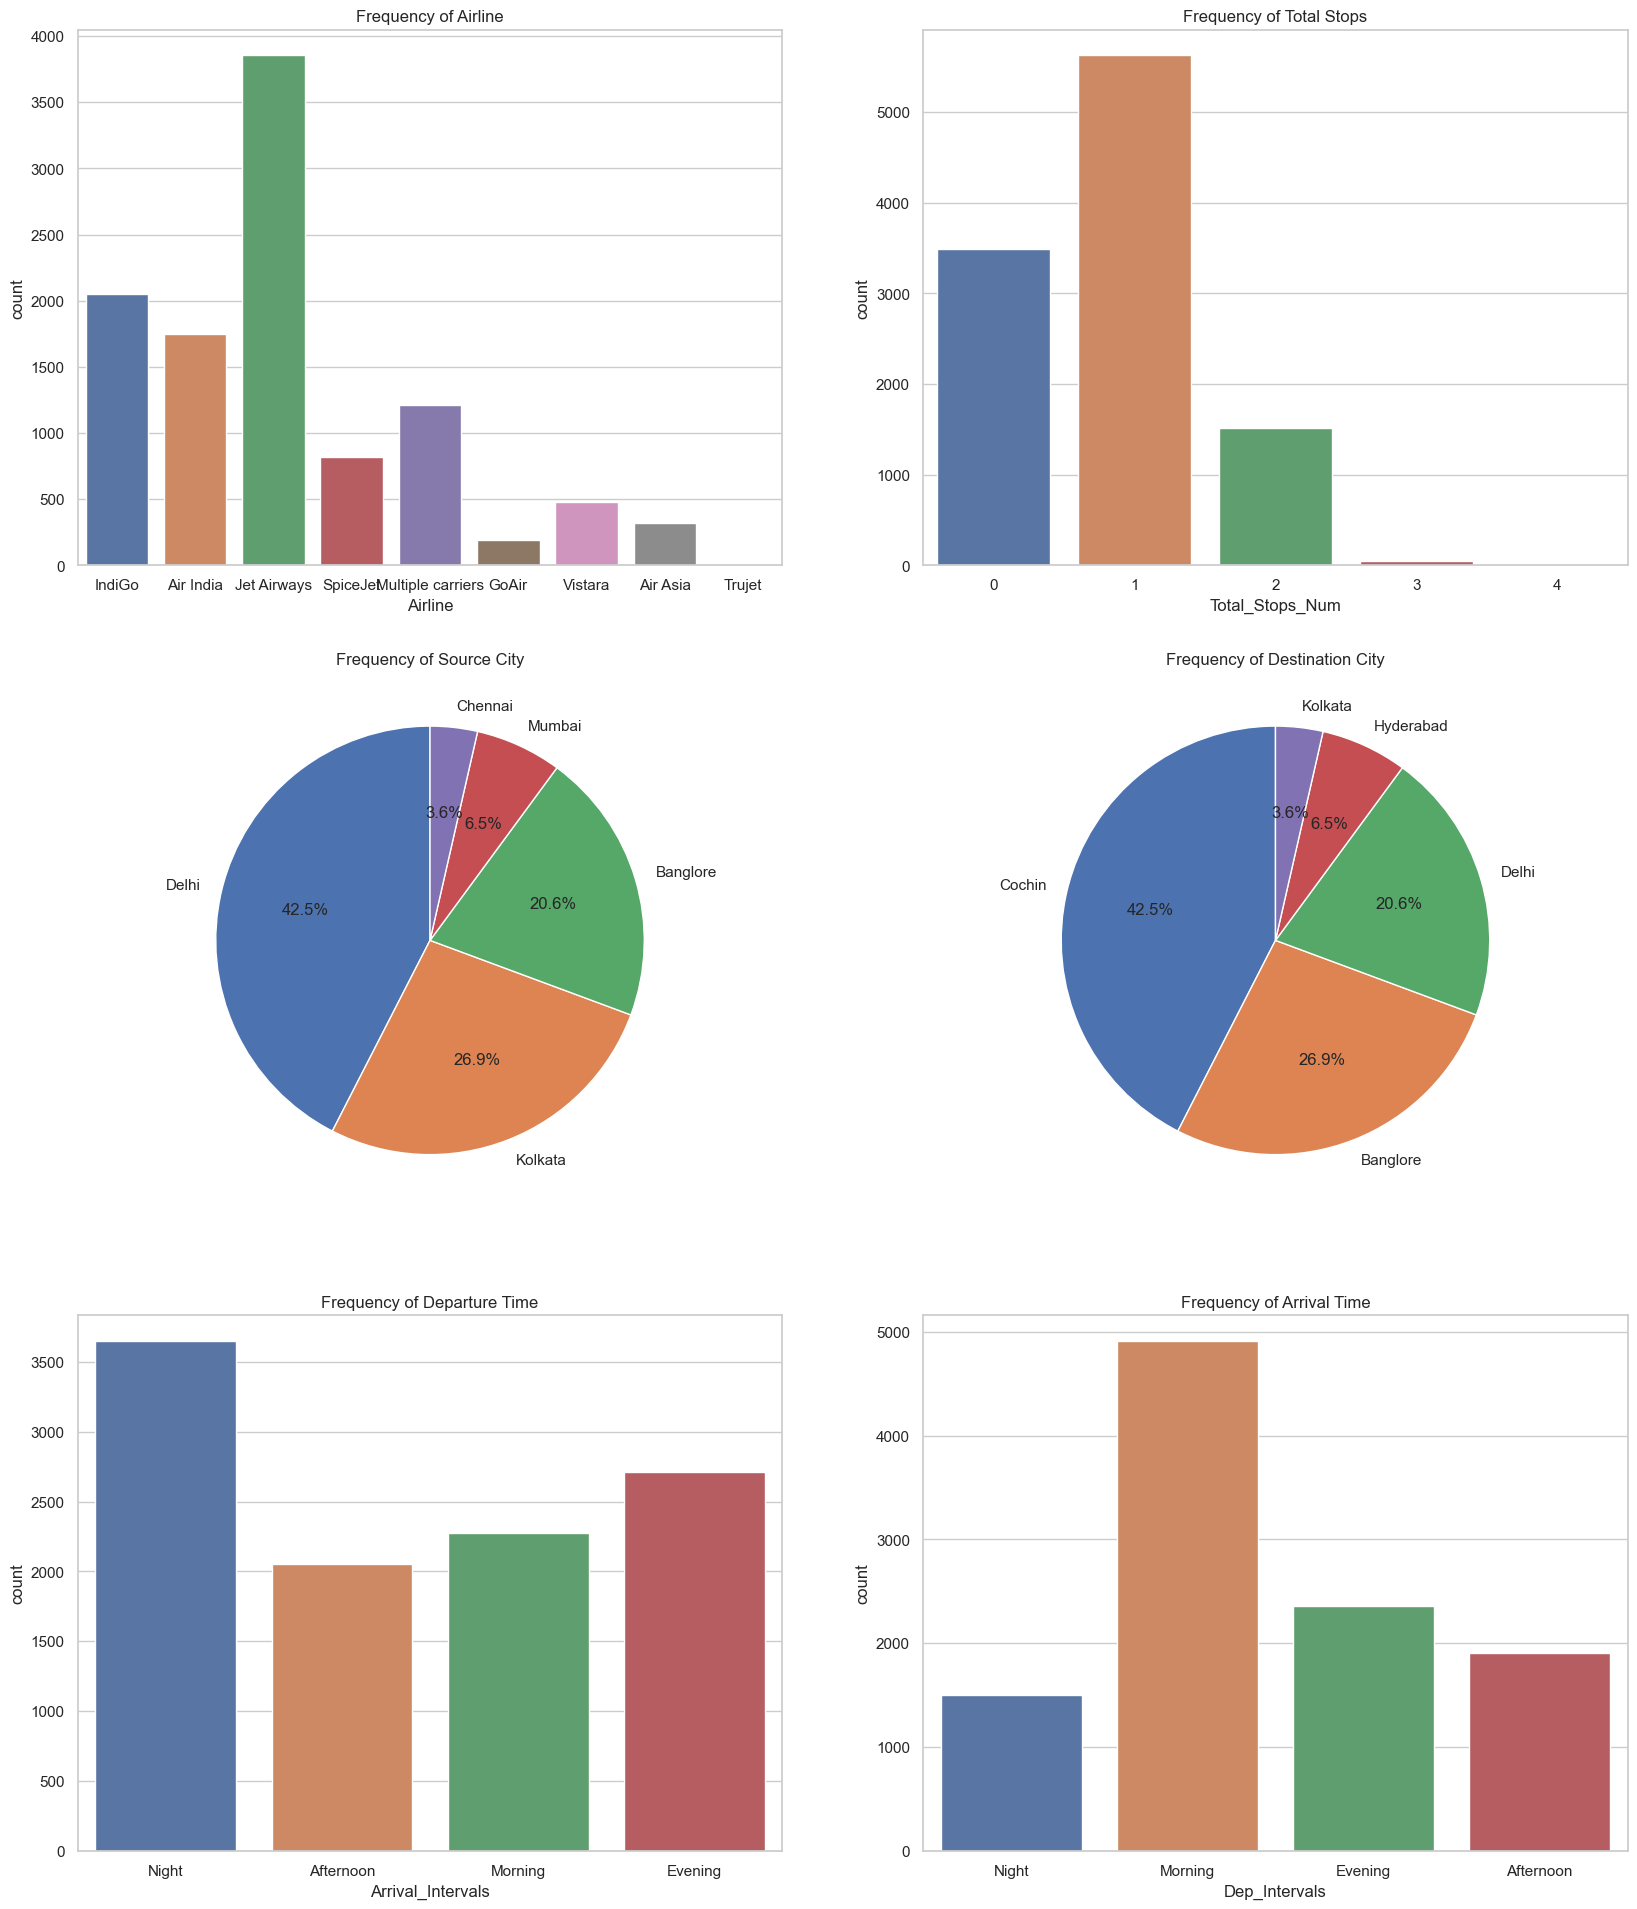

In [73]:
# Visualizations of categoric features with countplot
plt.figure(figsize=(20,32))

plt.subplot(4, 2, 1)
sns.countplot(x=eda["Airline"], data=eda)
plt.title("Frequency of Airline")


plt.subplot(4, 2, 2)
sns.countplot(x=eda["Total_Stops_Num"], data=eda)
plt.title("Frequency of Total Stops")

source_counts = eda['Source'].value_counts()
plt.subplot(4, 2, 3)
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
# sns.countplot(x=eda["Source"], data=eda)
plt.title("Frequency of Source City")

dest_counts = eda['Destination'].value_counts()
plt.subplot(4, 2, 4)
plt.pie(dest_counts, labels=dest_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 5)
sns.countplot(x=eda["Arrival_Intervals"], data=eda)
plt.title("Frequency of Departure Time")


plt.subplot(4, 2, 6)
sns.countplot(x=eda["Dep_Intervals"], data=eda)
plt.title("Frequency of Arrival Time")


plt.show()

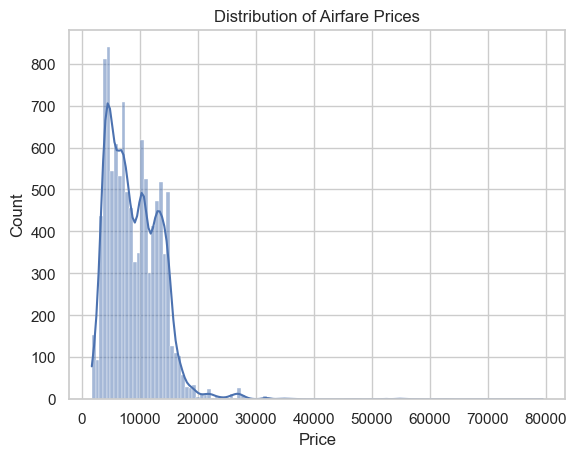

In [52]:
sns.histplot(eda['Price'], kde=True)
plt.title('Distribution of Airfare Prices')
plt.xlabel('Price')
plt.show()


# Boxplot,

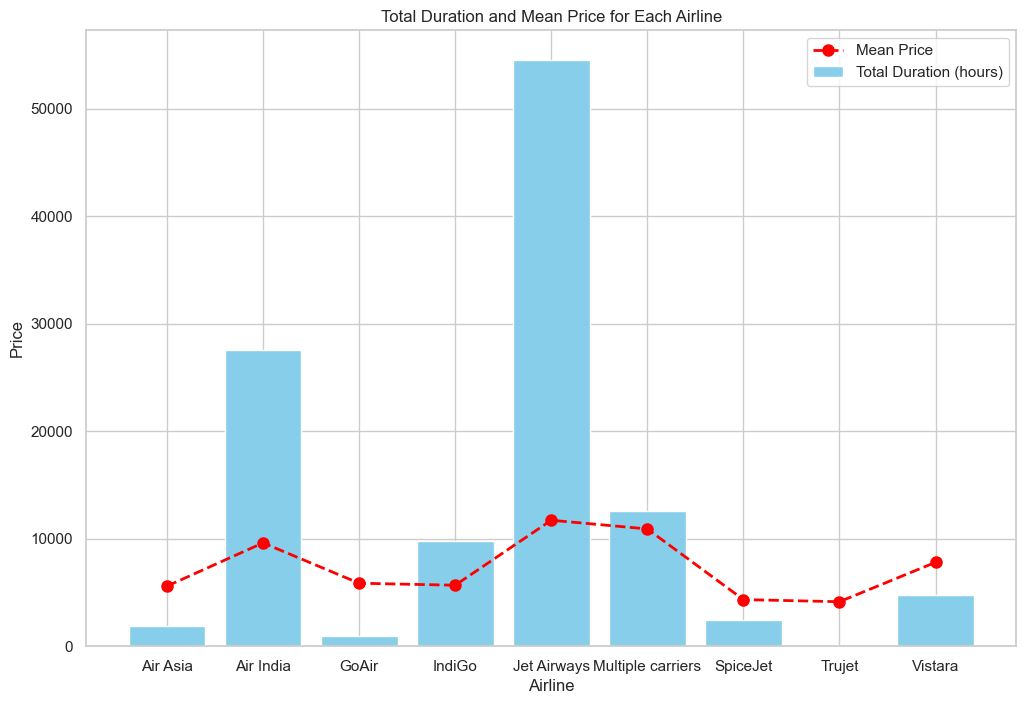

In [43]:
total_duration_by_airline = eda.groupby('Airline')['Duration_hours'].sum().reset_index()
mean_price_by_airline = eda.groupby('Airline')['Price'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Bar plot for total duration
bars = plt.bar(total_duration_by_airline['Airline'], total_duration_by_airline['Duration_hours'], color='skyblue', label='Total Duration (hours)')

# Line plot overlaid for mean price
plt.plot(mean_price_by_airline['Airline'], mean_price_by_airline['Price'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Mean Price')

plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Total Duration and Mean Price for Each Airline')
plt.legend()
plt.show()


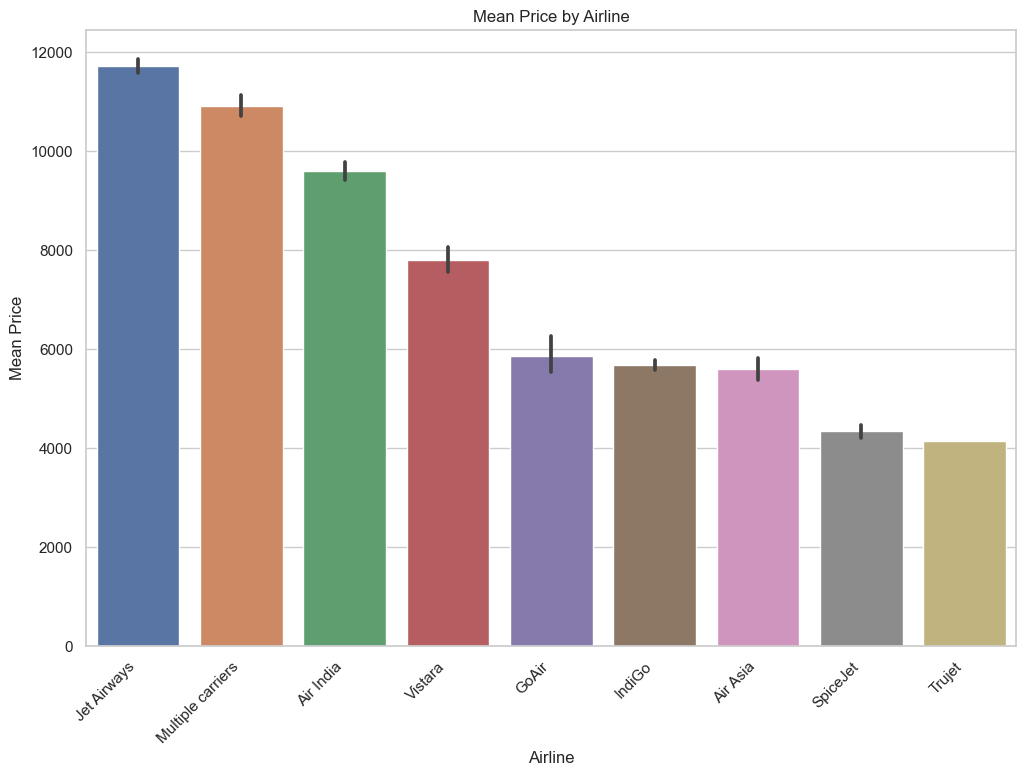

In [31]:
# Set the plot style
sns.set(style="whitegrid")

# Calculate mean or median price by airline
mean_price_by_airline = eda.groupby('Airline')['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Airline', y='Price', data=eda, order=mean_price_by_airline.sort_values('Price', ascending=False)['Airline'])
plt.title('Mean Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

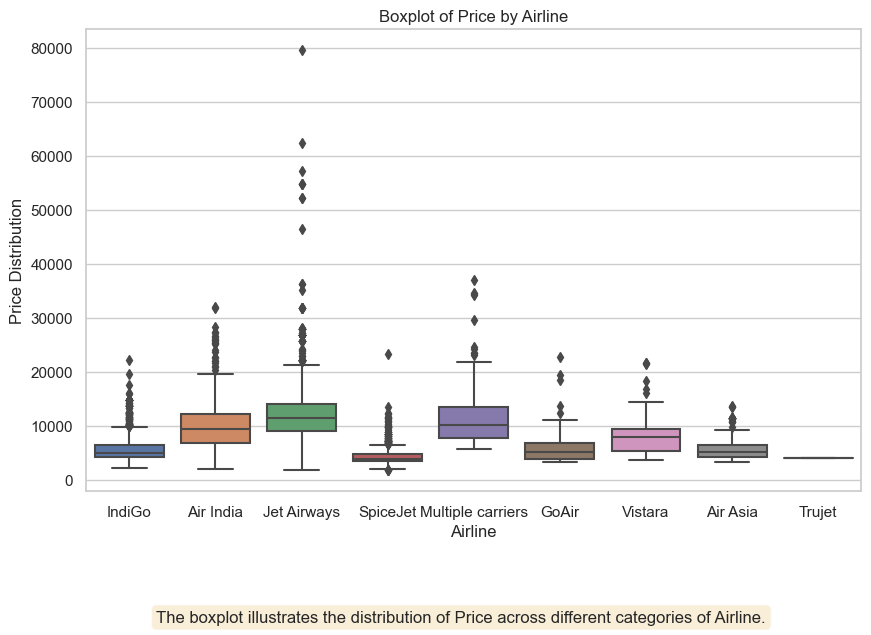

In [77]:
def explain_boxplot(df, x_column, y_column):
    """
    Generate a boxplot and provide dynamic explanations.

    Parameters:
    - df: DataFrame
    - x_column: str, column for x-axis
    - y_column: str, column for y-axis

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))

    # Create a boxplot
    sns.boxplot(x=x_column, y=y_column, data=df)

    # Add title
    plt.title(f'Boxplot of {y_column} by {x_column}')

    # Add explanations based on characteristics of the data
    if df[y_column].dtype in ['float64', 'int64']:
        plt.ylabel(f'{y_column} Distribution')
        plt.xlabel(f'{x_column}')
        explanation = f"The boxplot illustrates the distribution of {y_column} across different categories of {x_column}."
    else:
        plt.ylabel(f'{y_column} Category')
        plt.xlabel(f'{x_column}')
        explanation = f"The boxplot displays the spread of {y_column} for different {x_column} categories."

    # Display explanations
    plt.figtext(0.5, -0.1, explanation, ha='center', va='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Show the plot
    plt.show()

    
explain_boxplot(eda, 'Airline', 'Price')

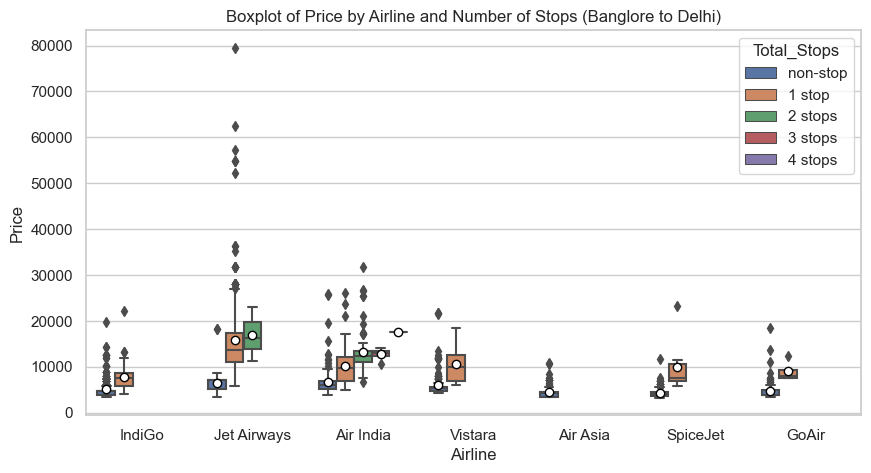

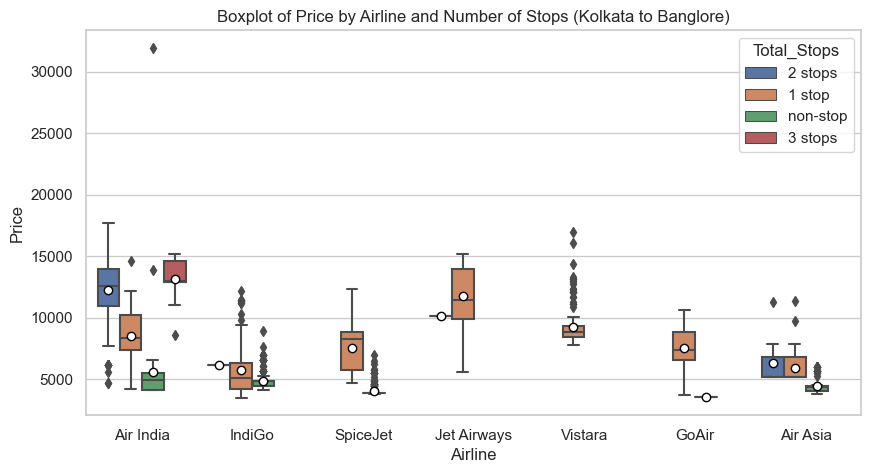

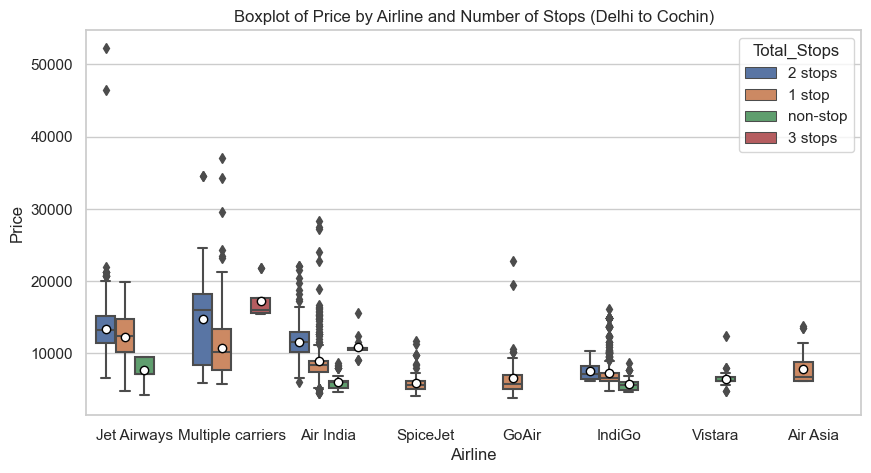

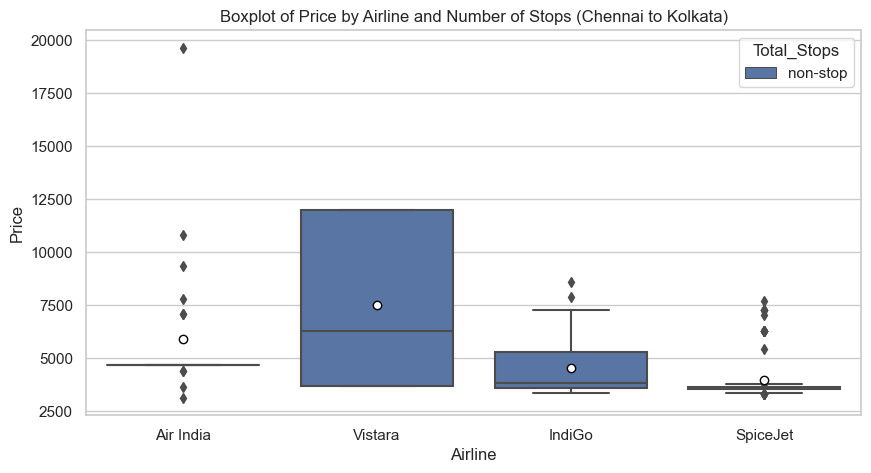

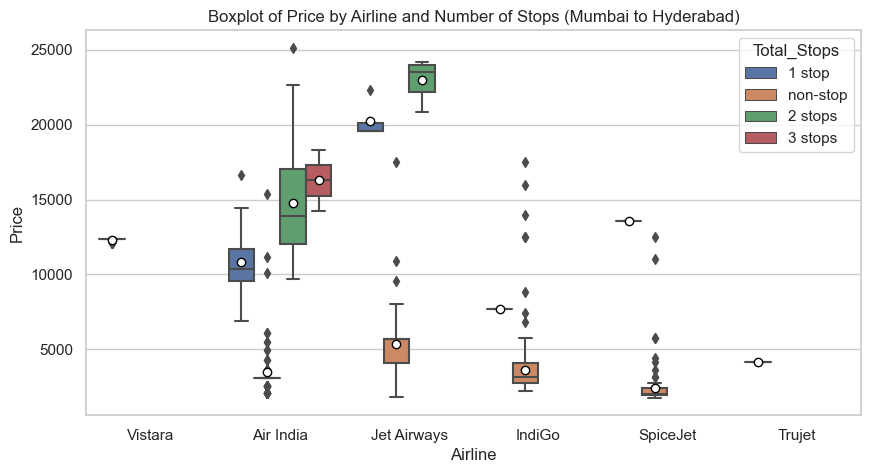

In [72]:
# Get unique source-destination pairs
unique_routes = eda[['Source', 'Destination']].drop_duplicates()

# Iterate over each unique route and create visualizations
for index, route in unique_routes.iterrows():
    source = route['Source']
    destination = route['Destination']

    # Filter DataFrame for the current source-destination pair
    filtered_df = eda[(eda['Source'] == source) & (eda['Destination'] == destination)]
    
    mean_price = filtered_df['Price'].mean()

    # Boxplot for Price distribution by Airline and Number of Stops
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Airline', y='Price', hue='Total_Stops', showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},  data=filtered_df)
    plt.title(f'Boxplot of Price by Airline and Number of Stops ({source} to {destination})')
    plt.show()
    
   
    # Scatterplot of Duration_hours vs. Price colored by Airline and Number of Stops
#     plt.figure(figsize=(12, 8))
#     sns.scatterplot(x='Duration_hours', y='Price', hue='Airline', style='Total_Stops', data=filtered_df, palette='viridis')
#     plt.title(f'Scatterplot of Duration_hours vs. Price colored by Airline and Number of Stops ({source} to {destination})')
#     plt.show()

In [33]:
total_duration_by_airline

,Airline,Duration_hours
0,Air Asia,1851.46
1,Air India,27542.31
2,GoAir,966.86
3,IndiGo,9764.35
4,Jet Airways,54549.23
5,Multiple carriers,12604.96
6,SpiceJet,2433.16
7,Trujet,3.25
8,Vistara,4784.98


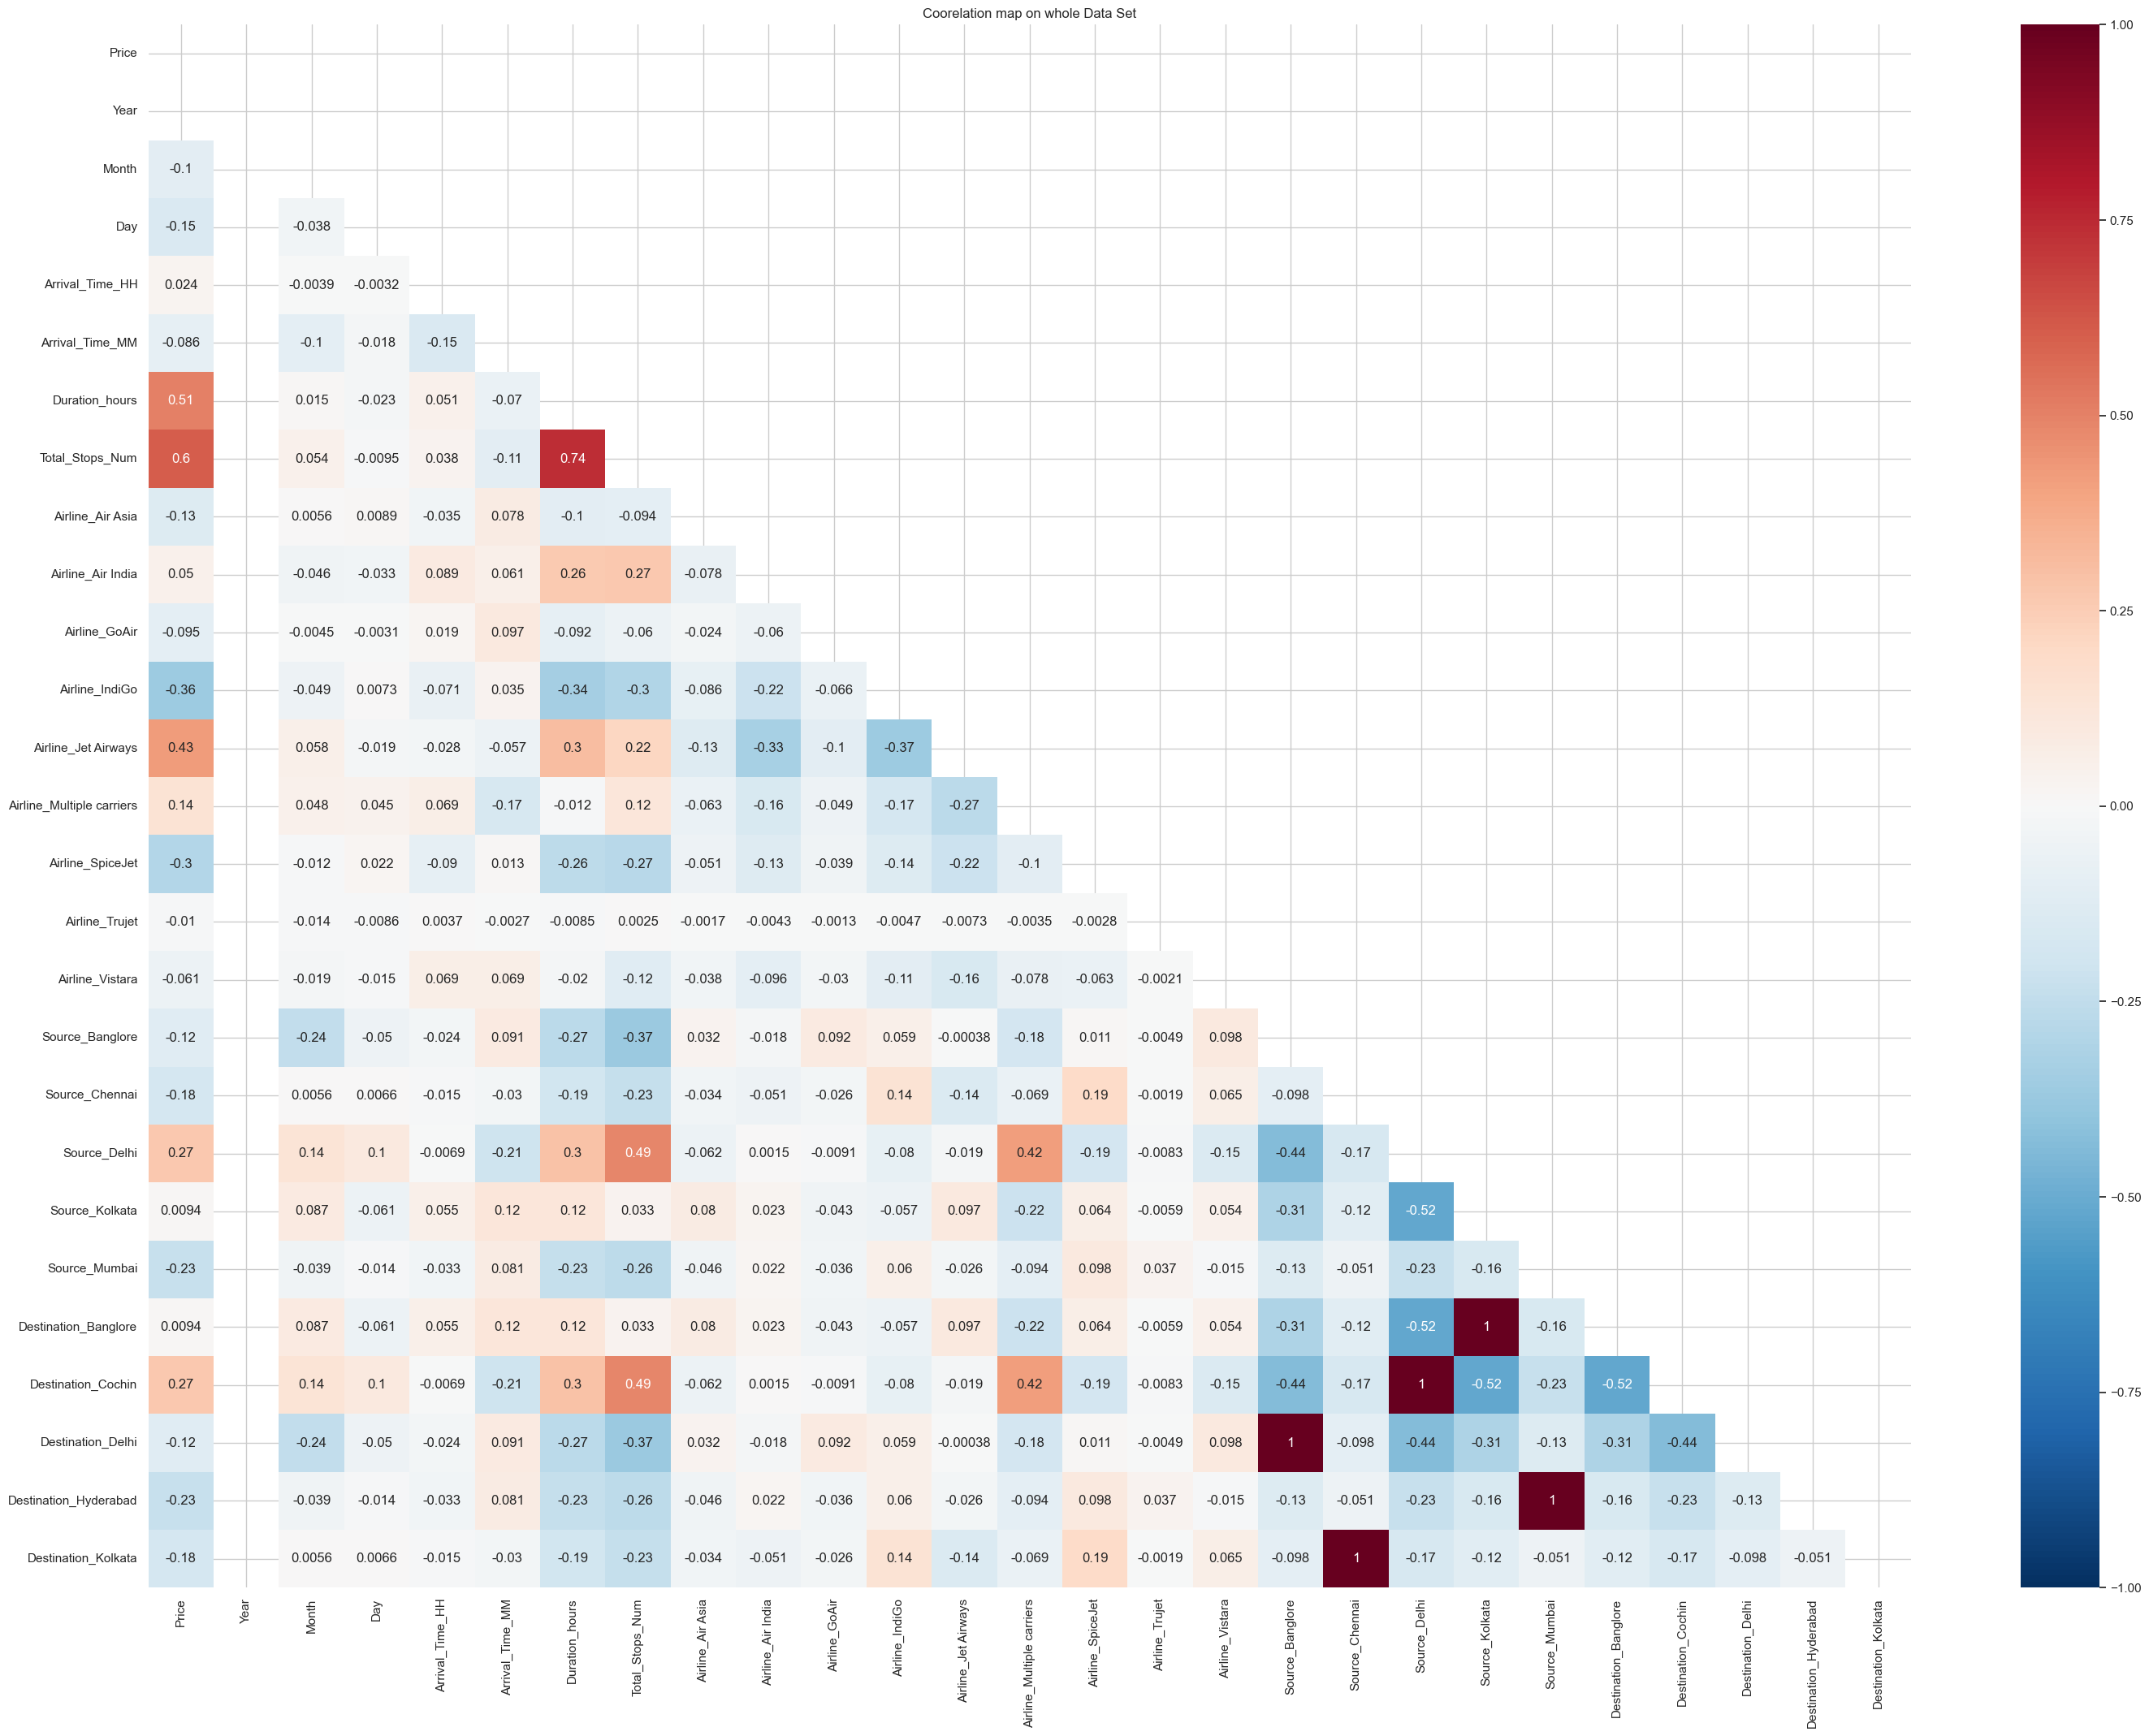

In [34]:
correlation_matrix=eda.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (35, 25))
plt.title('Coorelation map on whole Data Set')


sns.heatmap(correlation_matrix, mask=mask, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')
plt.show()

In [49]:
eda.describe().round(2)

,Price,Year,Month,Day,Arrival_Time_HH,Arrival_Time_MM,Duration_hours,Total_Stops_Num,Airline_Air Asia,Airline_Air India,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
count,10683.00,10683.0,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,...,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00,10683.00
mean,9087.06,2019.0,4.71,13.51,13.35,24.69,10.72,0.82,0.03,0.16,...,0.21,0.04,0.42,0.27,0.07,0.27,0.42,0.21,0.07,0.04
std,4611.36,0.0,1.16,8.48,6.86,16.51,8.46,0.68,0.17,0.37,...,0.40,0.19,0.49,0.44,0.25,0.44,0.49,0.40,0.25,0.19
min,1759.00,2019.0,3.00,1.00,0.00,0.00,0.08,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5277.00,2019.0,3.00,6.00,8.00,10.00,2.83,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8372.00,2019.0,5.00,12.00,14.00,25.00,8.67,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,12373.00,2019.0,6.00,21.00,19.00,35.00,15.50,1.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
max,79512.00,2019.0,6.00,27.00,23.00,55.00,47.67,4.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [50]:
price_iqr = eda['Price'].quantile(0.75) - eda['Price'].quantile(0.25)
price_iqr

7096.0

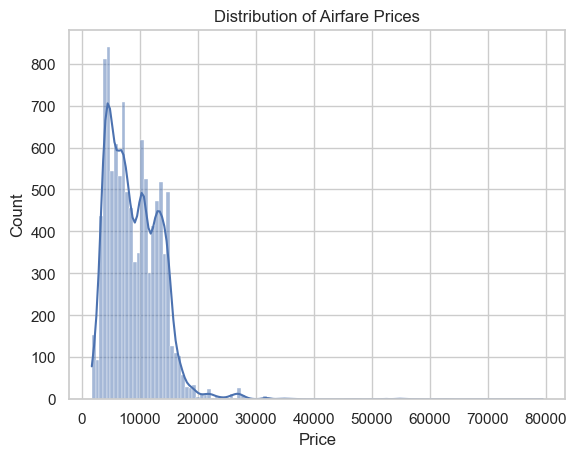

In [36]:
eda.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,3897,...,1,0,0,0,0,0,0,1,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,...,0,0,0,1,0,1,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,13882,...,0,0,1,0,0,0,1,0,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,...,0,0,0,1,0,1,0,0,0,0
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,...,1,0,0,0,0,0,0,1,0,0


In [37]:
 #     A
    #Airline vs Price Analysis
plt.figure(figsize=(10,8))
plt.title('Airline vs Price')

sns.barplot(x='Airline', y='Price', data=.sort_values('Price', ascending=False))
plt.show()


SyntaxError: invalid syntax (3290759012.py, line 6)

## From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median



In [ ]:
plt.figure(figsize=(10,8))
plt.title(' Total_Stops vs Price Analysis')
#     sns.bar(x='Total_Stops',y='Price',data=eda.sort_values('Price',ascending=False))
sns.barplot(x='Total_Stops', y='Price', data=eda.sort_values('Price', ascending=False))

plt.show()

In [ ]:
print(df['Source'].unique())   
plt.figure(figsize=(10,6))
plt.title('Source Vs Price')
sns.barplot(x='Source', y='Price', data=eda.sort_values('Price', ascending=False))
plt.show()

In [ ]:
    #Destination vs Price
plt.figure(figsize=(10,6))
plt.title('Destination vs Price')
sns.barplot(x='Destination', y='Price', data=eda.sort_values('Price', ascending=False))
plt.show()
    
    

In [ ]:
    #     ARRIVATL TIME VS PRICE
plt.figure(figsize=(10,6))
plt.title('Arrival Time Hours vs price')
sns.jointplot(x='Arrival_Time_HH', y='Price', data=_modelData.sort_values('Price', ascending=False), kind='hex', gridsize=15)
plt.show()

In [ ]:
# for i in _df.columns:
#     print(f'The value counts in the feature {i} are: ', _df[i].value_counts(), sep='\n' )
#     print('***************************************************************************')

In [ ]:
# print(_df[price], _df[year])


In [ ]:
# df_copy['Airline'].unique()

In [ ]:
#     print(df_copy['Additional_Info'].value_counts())
# #     Since Additional _info has Null value more than 80% we are ignoring this column for training
#     df_copy.drop(['Additional_Info'], axis=1, inplace=True)

In [ ]:
# Since we are not bothered about the route we will ignore this variable, we can utilize number of stops 
# df_copy.drop(['Route'], axis=1, inplace=True)

In [ ]:
# converting Date_of_Journey to date object to standardise 

# df_copy['Date_of_Journey'] = df_copy['Date_of_Journey'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())


In [ ]:
# df_copy.head()

In [ ]:
# df_copy = df.copy()

In [ ]:
# Convert duration to minutes

# df_copy['Duration_minutes'] = df_copy['Duration'].apply(lambda x: sum(int(num[:-1]) * (60 ** i) for i, num in enumerate(reversed(x.split()))))
# df_copy['Duration_minutes'] = df_copy['Duration'].apply(lambda x: sum(
#     (int(num[:-1]) * (60 ** i) if 'h' in num else int(num) * 60) for i, num in enumerate(reversed(x.split()))
# ))

# df_copy['Duration_minutes'] = df_copy['Duration'].apply(lambda x: sum(
#     (int(num[:-1]) * (60 ** i) if 'h' in num else int(num[:-1]) if 'm' in num else int(num) * 60) 
#     for i, num in enumerate(reversed(x.split()))
# ))
# df_copy['Duration_minutes'] = df_copy['Duration'].apply(lambda x: sum(
#     (int(num[:-1]) * (60 ** i) if 'm' in num else int(num[:-1]) * 60 if 'h' in num else int(num) * 60) 
#     for i, num in enumerate(reversed(x.split()))
# ))


# Di


In [ ]:
# df_copy.drop(['Duration'], axis=1, inplace=True)


In [ ]:
# # Destination check which value has more rows 
# df_copy['Destination'].value_counts()


In [ ]:

# df_copy['Destination'].replace({'New Delhi': 'Delhi'}, inplace=True)

In [ ]:
# df_copy['Total_Stops'].value_counts()

In [ ]:
# df_copy['Dep_Time'].isnull().sum()

In [ ]:
# df_copy['Dep_Time'].isna().sum()

In [ ]:
# We have only 1 nan value in Total_Stops 
# df_copy.dropna(subset=['Total_Stops'], inplace=True)


In [ ]:
# df_copy['Total_Stops'].isna().sum()

In [ ]:
# df_copy['Arrival_Time'].value_counts()

In [ ]:
# df_copy['Arrival_Time'] = pd.to_datetime(df_copy['Arrival_Time'], errors='coerce').dt.strftime('%H:%M')

In [ ]:
# df_copy['Arrival_Time_HH'] = df_copy['Arrival_Time'].str.split(':').str.get(0)
# df_copy['Arrival_Time_MM'] = df_copy['Arrival_Time'].str.split(':').str.get(1)

In [ ]:
# df_copy['Arrival_Time'].str.split(':').str.get(0)

In [ ]:
# # I see there are 2 patterns of arrival time hence checking the count
# import re
# pattern1 = re.compile(r'^\d{2}:\d{2}$')  # Matches 'hh:mm'
# pattern2 = re.compile(r'^\d{2}:\d{2} \d{2} \w{3}$')  # Matches 'hh:mm dd Mon'
# count_pattern1 = df_copy['Arrival_Time'].apply(lambda x: bool(pattern1.match(x))).sum()
# count_pattern2 = df_copy['Arrival_Time'].apply(lambda x: bool(pattern2.match(x))).sum()

# # Display the counts
# print("Count of 'hh:mm' format:", count_pattern1)
# print("Count of 'hh:mm dd Mon' format:", count_pattern2)
# total_count = count_pattern1 + count_pattern2
# percentage_pattern1 = (count_pattern1 / total_count) * 100
# percentage_pattern2 = (count_pattern2 / total_count) * 100

# # Display the percentages
# print("Percentage of 'hh:mm' format:", percentage_pattern1, "%")
# print("Percentage of 'hh:mm dd Mon' format:", percentage_pattern2, "%")

In [ ]:

#     df_copy['Dep_Time_HH'] = df_copy['Dep_Time'].str.split(':').str.get(0)
#     #Get Minutes from arrival time
#     df_copy['Dep_Time_MM'] = df_copy['Dep_Time'].str.split(':').str.get(1)

In [38]:
# df_copy.head()